In [1]:
# Naive Bayes
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\MSI\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
Th

In [2]:
import os
os.getcwd()

'C:\\Users\\MSI\\Desktop\\Master Class\\Data Science Session-wise content\\S033-NBC-2'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Churn_Modelling.csv',
 'Naive Bayes-Churn-MinMax.ipynb',
 'Naive Bayes-Churn.ipynb',
 'Naive Bayes-Churn_StandardScalar.ipynb',
 'Naive Bayes_Social_network_ads.ipynb',
 'Social_Network_Ads.csv']

In [4]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset=pd.get_dummies(dataset,columns=['Geography','Gender'],drop_first=True)
dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [8]:
dataset.shape

(10000, 12)

In [9]:
features=dataset.columns[dataset.columns != 'Exited']
X=dataset[features]
y=dataset.Exited.copy()

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [11]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
#classifier.get_params()

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
classifier.predict_proba(X_test)[0:5,:]

array([[0.68465639, 0.31534361],
       [0.87930528, 0.12069472],
       [0.75644886, 0.24355114],
       [0.84980789, 0.15019211],
       [0.58863825, 0.41136175]])

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1533,   45],
       [ 398,   24]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1578
           1       0.35      0.06      0.10       422

    accuracy                           0.78      2000
   macro avg       0.57      0.51      0.49      2000
weighted avg       0.70      0.78      0.71      2000



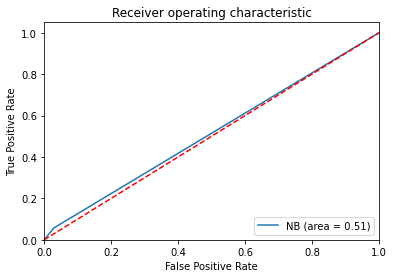

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

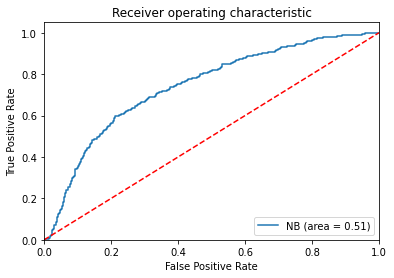

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
p=pd.DataFrame(classifier.predict_proba(X_test))
p.columns=['Z','O']
p.head()

,Z,O
0,0.684656,0.315344
1,0.879305,0.120695
2,0.756449,0.243551
3,0.849808,0.150192
4,0.588638,0.411362


In [22]:
X_test.shape

(2000, 11)

In [33]:
out=np.zeros(X_test.shape[0])
print(out[0:10])
out[p.index[p.O > 0.22]] = 1
print(out[0:10])
print(classification_report(y_test,out))
print("AUC=",roc_auc_score(y_test,out))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1578
           1       0.43      0.59      0.50       422

    accuracy                           0.75      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.78      0.75      0.76      2000

AUC= 0.6886424113551859


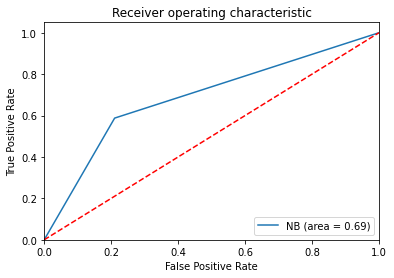

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, out)
fpr, tpr, thresholds = roc_curve(y_test, out)
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()